<a href="https://colab.research.google.com/github/fathurrahmanyahyasatrio/MarketBasketAnalysis/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Market Basket Analysis**

Introduction: In this notebook, we study consumer segmentation utilising the intriguing unsupervised learning method using the publicly available dataset On-line Retail. The next step is to use association rule mining to uncover intriguing patterns and rules in this transaction database. In terms of user interest, these customer segmentation, rules, and patterns can be leveraged to inform interesting and practical decisions.

The Online Retail is a transnational data collection that includes every transaction made by a UK-based, registered, and no-store online retailer between December 1, 2010, and December 9, 2011.The company primarily offers one-of-a-kind gifts for every occasion. The company has a large number of wholesalers as clients.


Market basket analysis: Gaining insights into specific client behaviour through market basket analysis. This aids in developing techniques that reveal a deeper comprehension of the choices made by clients while making purchases. The buyer may frequently be unaware of such biases or trends in their purchase behaviour, which makes this interesting.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
#load and read the dataset
import warnings
df = pd.read_csv("Groceries data.csv")

In [ ]:
df.head()

Member_number        Date   itemDescription  year  month  day  day_of_week
0           1808  2015-07-21    tropical fruit  2015      7   21            1
1           2552  2015-05-01        whole milk  2015      5    1            4
2           2300  2015-09-19         pip fruit  2015      9   19            5
3           1187  2015-12-12  other vegetables  2015     12   12            5
4           3037  2015-01-02        whole milk  2015      1    2            4

In [ ]:
df.shape

(38765, 7)

In [ ]:
#display the information regarding the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [ ]:
#capture the description of the dataset
df.describe()

Member_number          year         month           day   day_of_week
count   38765.000000  38765.000000  38765.000000  38765.000000  38765.000000
mean     3003.641868   2014.528518      6.477570     15.753231      3.014498
std      1153.611031      0.499193      3.431561      8.801391      1.987669
min      1000.000000   2014.000000      1.000000      1.000000      0.000000
25%      2002.000000   2014.000000      4.000000      8.000000      1.000000
50%      3005.000000   2015.000000      6.000000     16.000000      3.000000
75%      4007.000000   2015.000000      9.000000     23.000000      5.000000
max      5000.000000   2015.000000     12.000000     31.000000      6.000000

In [ ]:
#check for any null values in the dataset
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

The above output indicates that there are no null values present in the dataset

In [ ]:
#displaying the top 5 items in the dataset
df['itemDescription'].head()

0      tropical fruit
1          whole milk
2           pip fruit
3    other vegetables
4          whole milk
Name: itemDescription, dtype: object

In [ ]:
#to remove white spaces or specific characters from the beginning and the end of the string
df['itemDescription']=df['itemDescription'].str.strip()

In [ ]:
df['itemDescription'].head()

0      tropical fruit
1          whole milk
2           pip fruit
3    other vegetables
4          whole milk
Name: itemDescription, dtype: object

In [ ]:
#convert to date-time format
df.Date = pd.to_datetime(df.Date)
df['Member_number'] = df['Member_number'].astype('str')

In [ ]:
df['Member_number']

0        1808
1        2552
2        2300
3        1187
4        3037
         ... 
38760    4471
38761    2022
38762    1097
38763    1510
38764    1521
Name: Member_number, Length: 38765, dtype: object

Exploratory Data Analysis

In [ ]:
#number of customers
df['Member_number'].nunique()

3898

In [ ]:
#number of unique items
df['itemDescription'].nunique()

167

In [ ]:
#top 25 products sold
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
top_25=df.itemDescription.value_counts().sort_values(ascending=False)[0:25]
fig = px.bar(top_25,color=top_25.index, labels={'value':'Quantity Sold','index':'GroceryItems'})
fig.update_layout(showlegend=False, title_text='Top 25 Groceries Sold',title_x=0.5, title={'font':{'size':20}})
fig.show()

In [ ]:
#bottom 25 products sold
bot_25=df.itemDescription.value_counts().sort_values(ascending=False)[-25:]
fig = px.bar(bot_25,color=bot_25.index, labels={'value':'Quantity Sold','index':'GroceryItems'})
fig.update_layout(showlegend=False, title_text='Bottom 25 Groceries Sold',title_x=0.5, title={'font':{'size':20}})
fig.show()

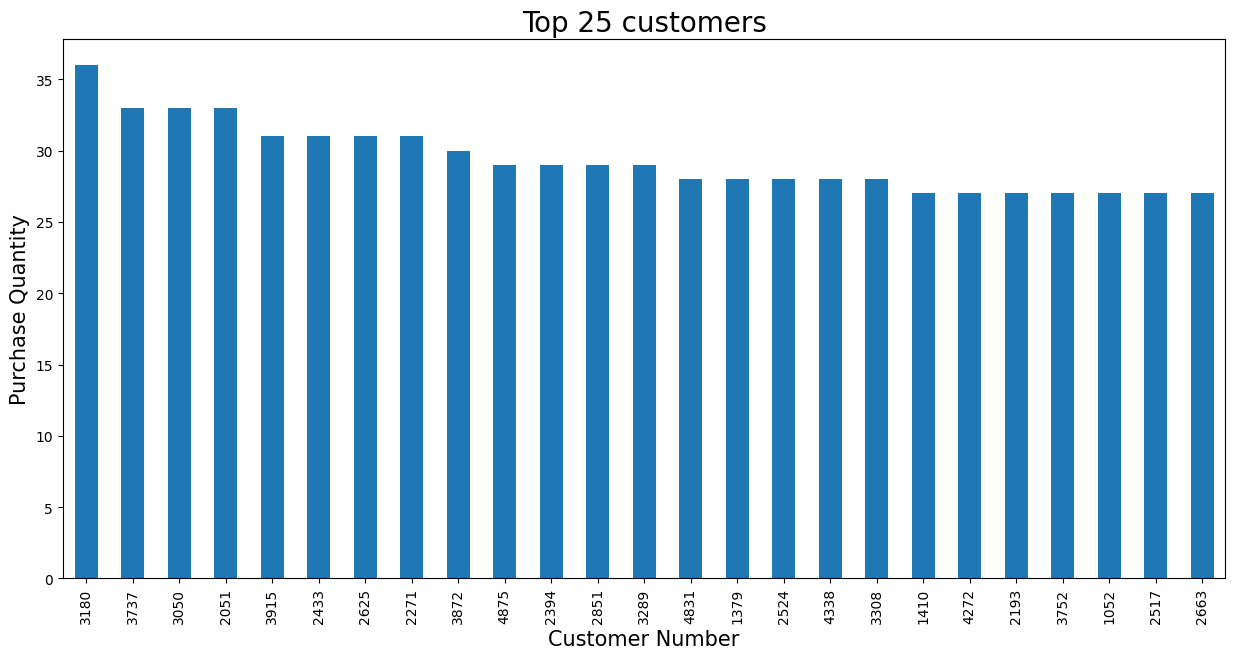

In [ ]:
#number of items bought by the top 25 customers
top_25c = df.groupby('Member_number').agg(PurchaseQuantity=('itemDescription','count')).sort_values(by='PurchaseQuantity',ascending=False)[0:25]
top_25c.plot(kind='bar', figsize=(15,7), legend=None)
plt.title('Top 25 customers', fontsize=20)
plt.xlabel('Customer Number', fontsize=15)
plt.ylabel('Purchase Quantity', fontsize=15)
plt.show()

In [ ]:
#frequency of items sold
item_freq = df.groupby(pd.Grouper(key='itemDescription')).size().reset_index(name='count')
fig = px.treemap(item_freq, path=['itemDescription'], values='count')
fig.update_layout(title_text='Frequency of the Items Sold', title_x=0.5, title_font=dict(size=18))
fig.update_traces(textinfo="label+value")
fig.show()

In [ ]:
df['itemDescription'].values

array(['tropical fruit', 'whole milk', 'pip fruit', ..., 'cake bar',
       'fruit/vegetable juice', 'cat food'], dtype=object)

Seasonal analysis and impact

In [ ]:
#Adding additional columns to better analyse the data according to seasons
df['Quantity']=1
df['Date']=df['Date'].astype('datetime64[ns]')
df['Month'] = df.Date.dt.month
df['Month'] = df['Date'].apply(lambda x:x.month)
df['Day of Week'] = df['Date'].apply(lambda time: time.dayofweek)
df['Year'] = df['Date'].apply(lambda t:t.year)
df['Day'] = df['Date'].apply(lambda t : t.day)
df

Member_number       Date        itemDescription  year  month  day  \
0              1808 2015-07-21         tropical fruit  2015      7   21   
1              2552 2015-05-01             whole milk  2015      5    1   
2              2300 2015-09-19              pip fruit  2015      9   19   
3              1187 2015-12-12       other vegetables  2015     12   12   
4              3037 2015-01-02             whole milk  2015      1    2   
...             ...        ...                    ...   ...    ...  ...   
38760          4471 2014-08-10          sliced cheese  2014      8   10   
38761          2022 2014-02-23                  candy  2014      2   23   
38762          1097 2014-04-16               cake bar  2014      4   16   
38763          1510 2014-03-12  fruit/vegetable juice  2014      3   12   
38764          1521 2014-12-26               cat food  2014     12   26   

       day_of_week  Quantity  Month  Day of Week  Year  Day  
0                1         1      7            1  2015   21  
1                4         1      5            4  2015    1  
2                5         1      9            5  2015   19  
3                5         1     12            5  2015   12  
4                4         1      1            4  2015    2  
...            ...       ...    ...          ...   ...  ...  
38760            6         1      8            6  2014   10  
38761            6         1      2            6  2014   23  
38762            2         1      4            2  2014   16  
38763            2         1      3            2  2014   12  
38764            4         1     12            4  2014   26  

[38765 rows x 12 columns]

In [ ]:
#Season : 1=Monsoon 2=Summer 3=Winter
#mapping months to seasons
m_to_s = {1: 3, 2: 2, 3: 2, 4: 2, 5: 2, 6: 1, 7: 1, 8: 1, 9: 1, 10: 3, 11: 3, 12: 3}
df['season']=df['Month'].map(m_to_s)
df

Member_number       Date        itemDescription  year  month  day  \
0              1808 2015-07-21         tropical fruit  2015      7   21   
1              2552 2015-05-01             whole milk  2015      5    1   
2              2300 2015-09-19              pip fruit  2015      9   19   
3              1187 2015-12-12       other vegetables  2015     12   12   
4              3037 2015-01-02             whole milk  2015      1    2   
...             ...        ...                    ...   ...    ...  ...   
38760          4471 2014-08-10          sliced cheese  2014      8   10   
38761          2022 2014-02-23                  candy  2014      2   23   
38762          1097 2014-04-16               cake bar  2014      4   16   
38763          1510 2014-03-12  fruit/vegetable juice  2014      3   12   
38764          1521 2014-12-26               cat food  2014     12   26   

       day_of_week  Quantity  Month  Day of Week  Year  Day  season  
0                1         1      7            1  2015   21       1  
1                4         1      5            4  2015    1       2  
2                5         1      9            5  2015   19       1  
3                5         1     12            5  2015   12       3  
4                4         1      1            4  2015    2       3  
...            ...       ...    ...          ...   ...  ...     ...  
38760            6         1      8            6  2014   10       1  
38761            6         1      2            6  2014   23       2  
38762            2         1      4            2  2014   16       2  
38763            2         1      3            2  2014   12       2  
38764            4         1     12            4  2014   26       3  

[38765 rows x 13 columns]

In [ ]:
#seasonwise grouping of product quantities
def seasonwise(x):
    df_n=df[df['itemDescription']==x].groupby('season').count()
    print(df_n)
seasonwise('tropical fruit')

        Member_number  Date  itemDescription  year  month  day  day_of_week  \
season                                                                        
1                 317   317              317   317    317  317          317   
2                 349   349              349   349    349  349          349   
3                 366   366              366   366    366  366          366   

        Quantity  Month  Day of Week  Year  Day  
season                                           
1            317    317          317   317  317  
2            349    349          349   349  349  
3            366    366          366   366  366  


In [ ]:
#number of each item bought in a particular season
dfs = df.groupby(['itemDescription','season'])['Quantity'].count()
dfs = dfs.reset_index()
dfs = dfs.sort_values(by=['Quantity','itemDescription'],ascending=False)
dfs=dfs.reset_index()
dfs

index   itemDescription  season  Quantity
0      487        whole milk       1       862
1      488        whole milk       2       825
2      489        whole milk       3       815
3      303  other vegetables       1       656
4      305  other vegetables       3       653
..     ...               ...     ...       ...
491     21  bathroom cleaner       2         1
492     16              bags       3         1
493     12    baby cosmetics       1         1
494     13    baby cosmetics       2         1
495     14    baby cosmetics       3         1

[496 rows x 4 columns]

Summer Season analysis

In [ ]:
#a data frame for the items sold only during summer
df_sum=df[(df['Month']>1)&(df['Month']<6)]
df_sum

Member_number       Date        itemDescription  year  month  day  \
1              2552 2015-05-01             whole milk  2015      5    1   
5              4941 2015-02-14             rolls/buns  2015      2   14   
8              2762 2015-03-20             whole milk  2015      3   20   
10             1340 2015-02-24           citrus fruit  2015      2   24   
11             2193 2015-04-14                   beef  2015      4   14   
...             ...        ...                    ...   ...    ...  ...   
38752          2824 2014-05-09        cling film/bags  2014      5    9   
38754          4796 2014-02-03  Instant food products  2014      2    3   
38761          2022 2014-02-23                  candy  2014      2   23   
38762          1097 2014-04-16               cake bar  2014      4   16   
38763          1510 2014-03-12  fruit/vegetable juice  2014      3   12   

       day_of_week  Quantity  Month  Day of Week  Year  Day  season  
1                4         1      5            4  2015    1       2  
5                5         1      2            5  2015   14       2  
8                4         1      3            4  2015   20       2  
10               1         1      2            1  2015   24       2  
11               1         1      4            1  2015   14       2  
...            ...       ...    ...          ...   ...  ...     ...  
38752            4         1      5            4  2014    9       2  
38754            0         1      2            0  2014    3       2  
38761            6         1      2            6  2014   23       2  
38762            2         1      4            2  2014   16       2  
38763            2         1      3            2  2014   12       2  

[12822 rows x 13 columns]

In [ ]:
#total number of each item sold during summer
sitem_fr = df_sum['itemDescription'].value_counts()
sitem=sitem_fr.reset_index()
print(sitem)
plt.figure(figsize=(50,30))
fig=px.treemap(sitem, path=['index'],values='itemDescription')
fig.show()

                index  itemDescription
0          whole milk              825
1    other vegetables              589
2          rolls/buns              568
3                soda              482
4              yogurt              462
..                ...              ...
160   rubbing alcohol                1
161        hair spray                1
162    baby cosmetics                1
163    frozen chicken                1
164  bathroom cleaner                1

[165 rows x 2 columns]


<Figure size 5000x3000 with 0 Axes>

In [ ]:
#top 10 items bought in the summer season
top_10s=df_sum.itemDescription.value_counts().sort_values(ascending=False)[0:10]
fig = px.bar(top_10s,color=top_10s.index, labels={'value':'Quantity Sold','index':'GroceryItems'})
fig.update_layout(showlegend=False, title_text='Top 10 Products Sold',title_x=0.5, title={'font':{'size':20}})
fig.show()

In [ ]:
#bottom 10 products sold in the summer
bot_10s=df_sum.itemDescription.value_counts().sort_values(ascending=False)[-10:]
fig = px.bar(bot_10s,color=bot_10s.index, labels={'value':'Quantity Sold','index':'GroceryItems'})
fig.update_layout(showlegend=False, title_text='Bottom 10 products Sold',title_x=0.5, title={'font':{'size':20}})
fig.show()

Monsoon Season analysis

In [ ]:
#a data frame for the items sold only during monsoon season
df_rai = df[(df['Month']>5)&(df['Month']<10)]
df_rai

Member_number       Date           itemDescription  year  month  day  \
0              1808 2015-07-21            tropical fruit  2015      7   21   
2              2300 2015-09-19                 pip fruit  2015      9   19   
6              4501 2015-08-05          other vegetables  2015      8    5   
12             1997 2015-07-21               frankfurter  2015      7   21   
14             4736 2015-07-21                    butter  2015      7   21   
...             ...        ...                       ...   ...    ...  ...   
38755          4586 2014-09-26             bottled water  2014      9   26   
38757          4376 2014-07-12                rolls/buns  2014      7   12   
38758          2511 2014-06-18  long life bakery product  2014      6   18   
38759          3364 2014-06-05                       oil  2014      6    5   
38760          4471 2014-08-10             sliced cheese  2014      8   10   

       day_of_week  Quantity  Month  Day of Week  Year  Day  season  
0                1         1      7            1  2015   21       1  
2                5         1      9            5  2015   19       1  
6                2         1      8            2  2015    5       1  
12               1         1      7            1  2015   21       1  
14               1         1      7            1  2015   21       1  
...            ...       ...    ...          ...   ...  ...     ...  
38755            4         1      9            4  2014   26       1  
38757            5         1      7            5  2014   12       1  
38758            2         1      6            2  2014   18       1  
38759            3         1      6            3  2014    5       1  
38760            6         1      8            6  2014   10       1  

[13045 rows x 13 columns]

In [ ]:
#total number of each item sold during monsoon season
ritem_fr = df_rai['itemDescription'].value_counts()
ritem=ritem_fr.reset_index()
print(ritem)
plt.figure(figsize=(50,30))
fig=px.treemap(ritem, path=['index'],values='itemDescription')
fig.show()

                index  itemDescription
0          whole milk              862
1    other vegetables              656
2          rolls/buns              576
3                soda              508
4              yogurt              441
..                ...              ...
160   make up remover                2
161  organic products                1
162   kitchen utensil                1
163            whisky                1
164    baby cosmetics                1

[165 rows x 2 columns]


<Figure size 5000x3000 with 0 Axes>

In [ ]:
#top 10 products sold in monsoon season
top_10r=df_rai.itemDescription.value_counts().sort_values(ascending=False)[0:10]
fig = px.bar(top_10r,color=top_10r.index, labels={'value':'Quantity Sold','index':'GroceryItems'})
fig.update_layout(showlegend=False, title_text='Top 10 Products Sold',title_x=0.5, title={'font':{'size':20}})
fig.show()

In [ ]:
#bottom 10 products sold in the monsoon season
bot_10r=df_rai.itemDescription.value_counts().sort_values(ascending=False)[-10:]
print(bot_10r)
fig = px.bar(bot_10r,color=bot_10r.index, labels={'value':'Quantity Sold','index':'GroceryItems'})
fig.update_layout(showlegend=False, title_text='Bottom 10 Products sold',title_x=0.5, title={'font':{'size':20}})
fig.show()

toilet cleaner      2
make up remover     2
rubbing alcohol     2
salad dressing      2
ready soups         2
frozen chicken      2
organic products    1
kitchen utensil     1
whisky              1
baby cosmetics      1
Name: itemDescription, dtype: int64


Winter Season Analysis

In [ ]:
#a data frame for the items sold only during winter
df_win = df[(df['Month']>9)|(df['Month']==1)]
df_win

Member_number       Date        itemDescription  year  month  day  \
3              1187 2015-12-12       other vegetables  2015     12   12   
4              3037 2015-01-02             whole milk  2015      1    2   
7              3803 2015-12-23             pot plants  2015     12   23   
9              4119 2015-12-02         tropical fruit  2015     12    2   
21             2867 2015-12-11             whole milk  2015     12   11   
...             ...        ...                    ...   ...    ...  ...   
38748          2789 2014-12-07                  sugar  2014     12    7   
38750          3761 2014-12-02                  sugar  2014     12    2   
38753          1146 2014-12-07                waffles  2014     12    7   
38756          1987 2014-10-29  fruit/vegetable juice  2014     10   29   
38764          1521 2014-12-26               cat food  2014     12   26   

       day_of_week  Quantity  Month  Day of Week  Year  Day  season  
3                5         1     12            5  2015   12       3  
4                4         1      1            4  2015    2       3  
7                2         1     12            2  2015   23       3  
9                2         1     12            2  2015    2       3  
21               4         1     12            4  2015   11       3  
...            ...       ...    ...          ...   ...  ...     ...  
38748            6         1     12            6  2014    7       3  
38750            1         1     12            1  2014    2       3  
38753            6         1     12            6  2014    7       3  
38756            2         1     10            2  2014   29       3  
38764            4         1     12            4  2014   26       3  

[12898 rows x 13 columns]

In [ ]:
#frequency of items sold in the winter season
witem_fr = df_win['itemDescription'].value_counts()
witem=witem_fr.reset_index()
print(witem)
plt.figure(figsize=(50,30))
fig=px.treemap(witem, path=['index'],values='itemDescription')
fig.show()

                     index  itemDescription
0               whole milk              815
1         other vegetables              653
2               rolls/buns              572
3                     soda              524
4                   yogurt              431
..                     ...              ...
161         baby cosmetics                1
162                   bags                1
163        make up remover                1
164         toilet cleaner                1
165  preservation products                1

[166 rows x 2 columns]


<Figure size 5000x3000 with 0 Axes>

In [ ]:
#top 10 products sold in winter
top_10w=df_win.itemDescription.value_counts().sort_values(ascending=False)[0:10]
fig = px.bar(top_10w,color=top_10w.index, labels={'value':'Quantity Sold','index':'GroceryItems'})
fig.update_layout(showlegend=False, title_text='Top 10 Products Sold',title_x=0.5, title={'font':{'size':20}})
fig.show()

In [ ]:
#bottom 10 products sold in winter
bot_10w=df_win.itemDescription.value_counts().sort_values(ascending=False)[-10:]
print(bot_10w)
fig = px.bar(bot_10w,color=bot_10w.index, labels={'value':'Quantity Sold','index':'GroceryItems'})
fig.update_layout(showlegend=False, title_text='Bottom 10 Products sold',title_x=0.5, title={'font':{'size':20}})
fig.show()

whisky                   3
frozen chicken           2
salad dressing           2
rubbing alcohol          2
decalcifier              2
baby cosmetics           1
bags                     1
make up remover          1
toilet cleaner           1
preservation products    1
Name: itemDescription, dtype: int64


In [ ]:
#making a list of the top 15 products sold in every season combined
l = list(set(sitem[0:15]['index'].to_list()+witem[0:15]['index'].to_list()+ritem[0:15]['index'].to_list()))
l

['yogurt',
 'whipped/sour cream',
 'citrus fruit',
 'canned beer',
 'soda',
 'other vegetables',
 'sausage',
 'shopping bags',
 'whole milk',
 'pastry',
 'bottled water',
 'root vegetables',
 'bottled beer',
 'pip fruit',
 'tropical fruit',
 'rolls/buns']

In [ ]:
dfs

index   itemDescription  season  Quantity
0      487        whole milk       1       862
1      488        whole milk       2       825
2      489        whole milk       3       815
3      303  other vegetables       1       656
4      305  other vegetables       3       653
..     ...               ...     ...       ...
491     21  bathroom cleaner       2         1
492     16              bags       3         1
493     12    baby cosmetics       1         1
494     13    baby cosmetics       2         1
495     14    baby cosmetics       3         1

[496 rows x 4 columns]

<Figure size 7500x2000 with 0 Axes>

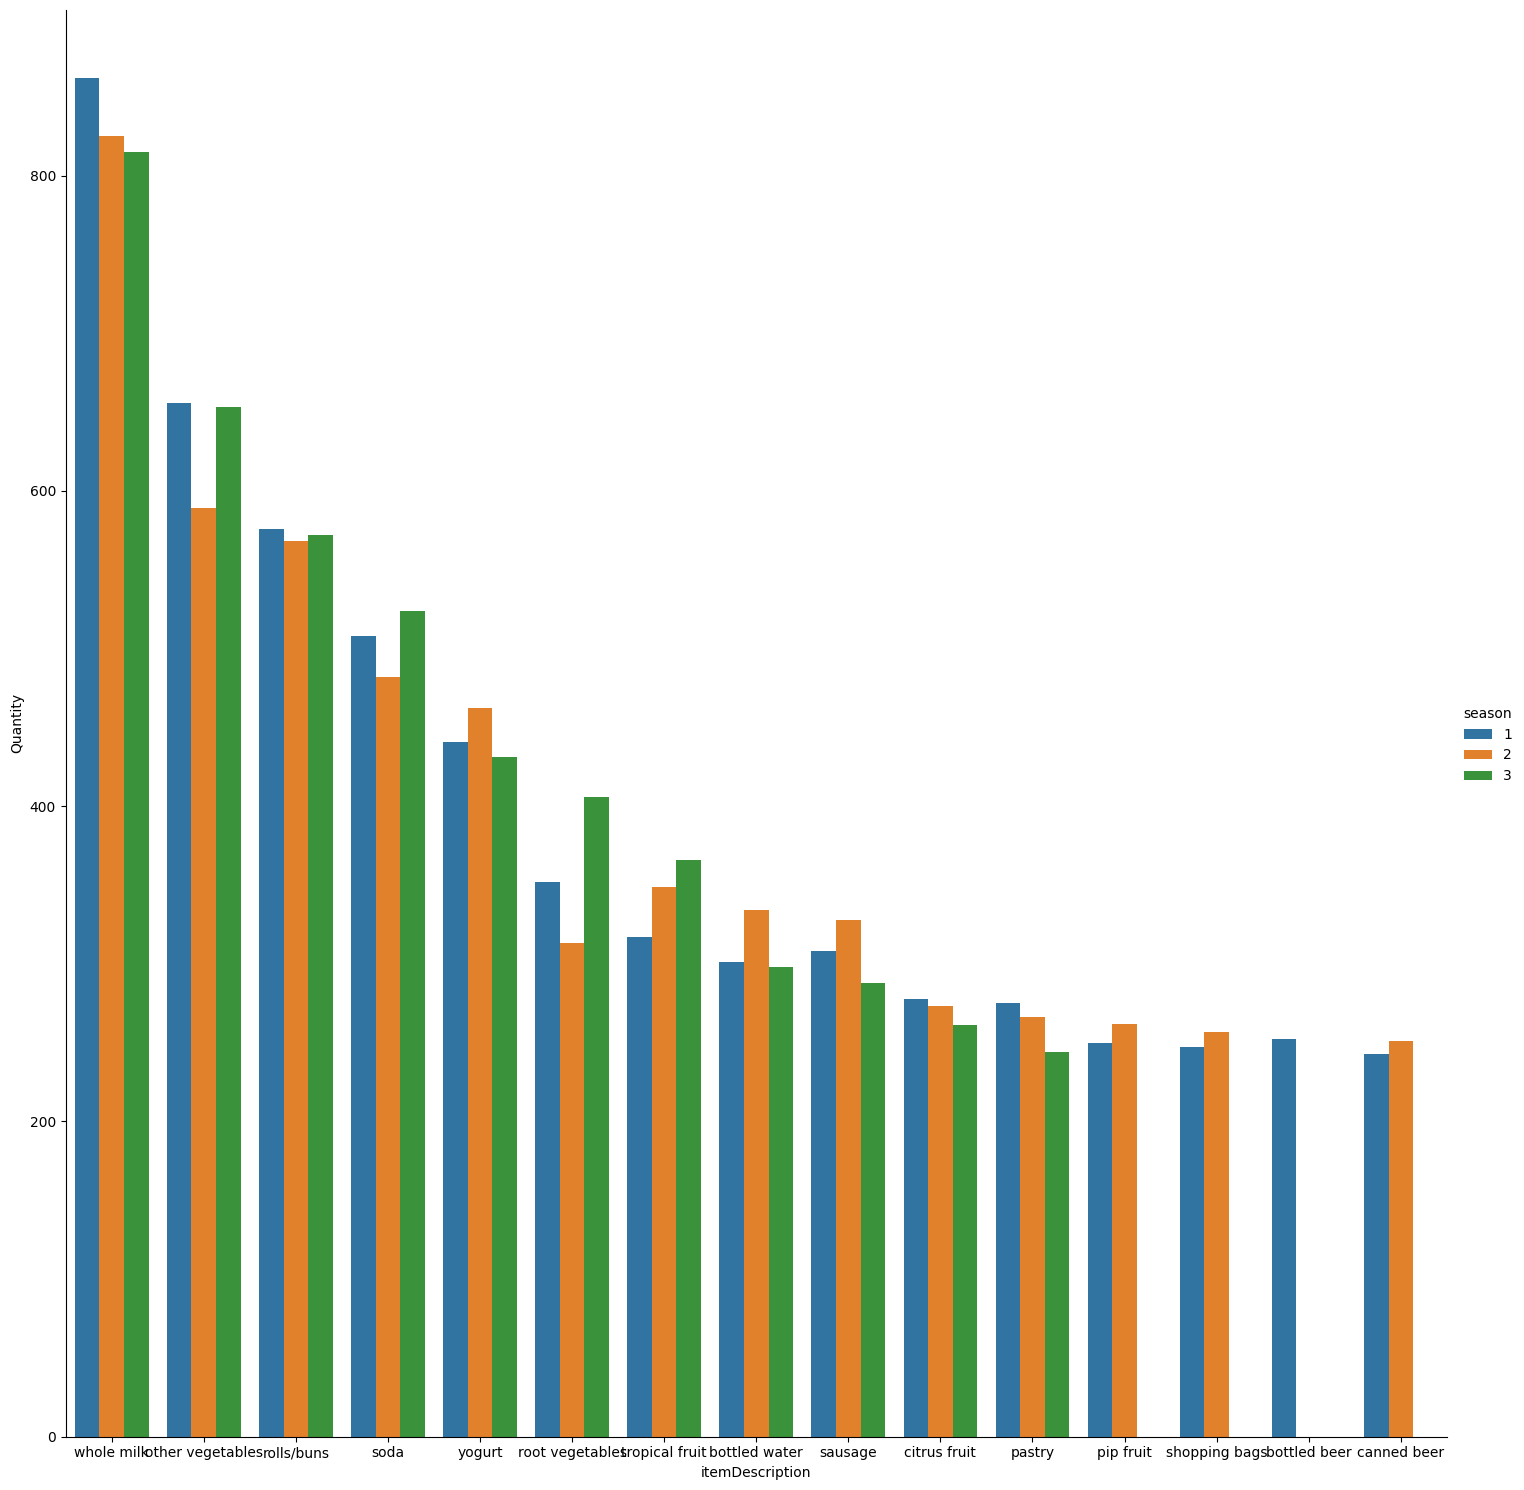

In [ ]:
#the seasonal distribution of the top 15 products
plt.figure(figsize=(75,20))
ax=sns.catplot(x="itemDescription",y="Quantity", hue="season", kind="bar", data=dfs[0:40], height=15, aspect=0.98)
plt.show()

From the above bar graph, it can be inferred that pip fruit, shopping bags and canned beer are not bought in the winter season. Bottled beer is not purchased during the summer and winter. The same analysis can be done throughout the dataset across all the items.

### Apriori Algorithm

In [ ]:
baskets=df.groupby(['Member_number','itemDescription'])['itemDescription'].count().unstack()
baskets

itemDescription  Instant food products  UHT-milk  abrasive cleaner  \
Member_number                                                        
1000                               NaN       NaN               NaN   
1001                               NaN       NaN               NaN   
1002                               NaN       NaN               NaN   
1003                               NaN       NaN               NaN   
1004                               NaN       NaN               NaN   
...                                ...       ...               ...   
4996                               NaN       NaN               NaN   
4997                               NaN       NaN               NaN   
4998                               NaN       NaN               NaN   
4999                               NaN       NaN               NaN   
5000                               NaN       NaN               NaN   

itemDescription  artif. sweetener  baby cosmetics  bags  baking powder  \
Member_number                                                            
1000                          NaN             NaN   NaN            NaN   
1001                          NaN             NaN   NaN            NaN   
1002                          NaN             NaN   NaN            NaN   
1003                          NaN             NaN   NaN            NaN   
1004                          NaN             NaN   NaN            NaN   
...                           ...             ...   ...            ...   
4996                          NaN             NaN   NaN            NaN   
4997                          NaN             NaN   NaN            NaN   
4998                          NaN             NaN   NaN            NaN   
4999                          NaN             NaN   NaN            NaN   
5000                          NaN             NaN   NaN            NaN   

itemDescription  bathroom cleaner  beef  berries  ...  turkey  vinegar  \
Member_number                                     ...                    
1000                          NaN   NaN      NaN  ...     NaN      NaN   
1001                          NaN   1.0      NaN  ...     NaN      NaN   
1002                          NaN   NaN      NaN  ...     NaN      NaN   
1003                          NaN   NaN      NaN  ...     NaN      NaN   
1004                          NaN   NaN      NaN  ...     NaN      NaN   
...                           ...   ...      ...  ...     ...      ...   
4996                          NaN   NaN      NaN  ...     NaN      NaN   
4997                          NaN   NaN      NaN  ...     NaN      NaN   
4998                          NaN   NaN      NaN  ...     NaN      NaN   
4999                          NaN   NaN      2.0  ...     NaN      NaN   
5000                          NaN   NaN      NaN  ...     NaN      NaN   

itemDescription  waffles  whipped/sour cream  whisky  white bread  white wine  \
Member_number                                                                   
1000                 NaN                 NaN     NaN          NaN         NaN   
1001                 NaN                 1.0     NaN          1.0         NaN   
1002                 NaN                 NaN     NaN          NaN         NaN   
1003                 NaN                 NaN     NaN          NaN         NaN   
1004                 NaN                 NaN     NaN          NaN         NaN   
...                  ...                 ...     ...          ...         ...   
4996                 NaN                 NaN     NaN          NaN         NaN   
4997                 NaN                 NaN     NaN          NaN         1.0   
4998                 NaN                 NaN     NaN          NaN         NaN   
4999                 NaN                 1.0     NaN          NaN         NaN   
5000                 NaN                 NaN     NaN          NaN         NaN   

itemDescription  whole milk  yogurt  zwieback  
Member_number                                  
1000         

In [ ]:
baskets.head()

itemDescription  Instant food products  UHT-milk  abrasive cleaner  \
Member_number                                                        
1000                               NaN       NaN               NaN   
1001                               NaN       NaN               NaN   
1002                               NaN       NaN               NaN   
1003                               NaN       NaN               NaN   
1004                               NaN       NaN               NaN   

itemDescription  artif. sweetener  baby cosmetics  bags  baking powder  \
Member_number                                                            
1000                          NaN             NaN   NaN            NaN   
1001                          NaN             NaN   NaN            NaN   
1002                          NaN             NaN   NaN            NaN   
1003                          NaN             NaN   NaN            NaN   
1004                          NaN             NaN   NaN            NaN   

itemDescription  bathroom cleaner  beef  berries  ...  turkey  vinegar  \
Member_number                                     ...                    
1000                          NaN   NaN      NaN  ...     NaN      NaN   
1001                          NaN   1.0      NaN  ...     NaN      NaN   
1002                          NaN   NaN      NaN  ...     NaN      NaN   
1003                          NaN   NaN      NaN  ...     NaN      NaN   
1004                          NaN   NaN      NaN  ...     NaN      NaN   

itemDescription  waffles  whipped/sour cream  whisky  white bread  white wine  \
Member_number                                                                   
1000                 NaN                 NaN     NaN          NaN         NaN   
1001                 NaN                 1.0     NaN          1.0         NaN   
1002                 NaN                 NaN     NaN          NaN         NaN   
1003                 NaN                 NaN     NaN          NaN         NaN   
1004                 NaN                 NaN     NaN          NaN         NaN   

itemDescription  whole milk  yogurt  zwieback  
Member_number                                  
1000                    2.0     1.0       NaN  
1001                    2.0     NaN       NaN  
1002                    1.0     NaN       NaN  
1003                    NaN     NaN       NaN  
1004                    3.0     NaN       NaN  

[5 rows x 167 columns]

In [ ]:
#checking for not null values
baskets.notnull().sum()

itemDescription
Instant food products      60
UHT-milk                  306
abrasive cleaner           22
artif. sweetener           29
baby cosmetics              3
                         ... 
white bread               346
white wine                172
whole milk               1786
yogurt                   1103
zwieback                   60
Length: 167, dtype: int64

In [ ]:
baskets=baskets.fillna(0).reset_index()
baskets.head()

itemDescription Member_number  Instant food products  UHT-milk  \
0                        1000                    0.0       0.0   
1                        1001                    0.0       0.0   
2                        1002                    0.0       0.0   
3                        1003                    0.0       0.0   
4                        1004                    0.0       0.0   

itemDescription  abrasive cleaner  artif. sweetener  baby cosmetics  bags  \
0                             0.0               0.0             0.0   0.0   
1                             0.0               0.0             0.0   0.0   
2                             0.0               0.0             0.0   0.0   
3                             0.0               0.0             0.0   0.0   
4                             0.0               0.0             0.0   0.0   

itemDescription  baking powder  bathroom cleaner  beef  ...  turkey  vinegar  \
0                          0.0               0.0   0.0  ...     0.0      0.0   
1                          0.0               0.0   1.0  ...     0.0      0.0   
2                          0.0               0.0   0.0  ...     0.0      0.0   
3                          0.0               0.0   0.0  ...     0.0      0.0   
4                          0.0               0.0   0.0  ...     0.0      0.0   

itemDescription  waffles  whipped/sour cream  whisky  white bread  white wine  \
0                    0.0                 0.0     0.0          0.0         0.0   
1                    0.0                 1.0     0.0          1.0         0.0   
2                    0.0                 0.0     0.0          0.0         0.0   
3                    0.0                 0.0     0.0          0.0         0.0   
4                    0.0                 0.0     0.0          0.0         0.0   

itemDescription  whole milk  yogurt  zwieback  
0                       2.0     1.0       0.0  
1                       2.0     0.0       0.0  
2                       1.0     0.0       0.0  
3                       0.0     0.0       0.0  
4                       3.0     0.0       0.0  

[5 rows x 168 columns]

In [ ]:
def convert_values(value):
    if value <= 0:
        return 0
    elif value >=1:
        return 1

In [ ]:
baskets = baskets.iloc[:, 1:baskets.shape[1]].applymap(convert_values)
baskets.head()

itemDescription  Instant food products  UHT-milk  abrasive cleaner  \
0                                    0         0                 0   
1                                    0         0                 0   
2                                    0         0                 0   
3                                    0         0                 0   
4                                    0         0                 0   

itemDescription  artif. sweetener  baby cosmetics  bags  baking powder  \
0                               0               0     0              0   
1                               0               0     0              0   
2                               0               0     0              0   
3                               0               0     0              0   
4                               0               0     0              0   

itemDescription  bathroom cleaner  beef  berries  ...  turkey  vinegar  \
0                               0     0        0  ...       0        0   
1                               0     1        0  ...       0        0   
2                               0     0        0  ...       0        0   
3                               0     0        0  ...       0        0   
4                               0     0        0  ...       0        0   

itemDescription  waffles  whipped/sour cream  whisky  white bread  white wine  \
0                      0                   0       0            0           0   
1                      0                   1       0            1           0   
2                      0                   0       0            0           0   
3                      0                   0       0            0           0   
4                      0                   0       0            0           0   

itemDescription  whole milk  yogurt  zwieback  
0                         1       1         0  
1                         1       0         0  
2                         1       0         0  
3                         0       0         0  
4                         1       0         0  

[5 rows x 167 columns]

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

In [ ]:
df_new = pd.DataFrame(baskets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#the item sets for which the support is greater or equal to 0.05
freq_items = apriori(df_new, min_support=0.05, use_colnames=True, max_len=3).sort_values(by='support')
freq_items.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



support                                        itemsets
80   0.050026                           (whole milk, chicken)
88   0.050026                              (rolls/buns, curd)
101  0.050026                   (other vegetables, margarine)
158  0.050282         (whole milk, sausage, other vegetables)
160  0.050539  (whole milk, other vegetables, tropical fruit)
57   0.050795                        (beef, other vegetables)
95   0.051052                             (soda, frankfurter)
103  0.051565                  (other vegetables, newspapers)
87   0.051565                        (other vegetables, curd)
79   0.051821                           (yogurt, canned beer)

In [ ]:
#creating association rules for indicating antecedents and consequent items
rules=association_rules(freq_items, metric="lift", min_threshold=1).sort_values('lift',ascending=False)
rules=rules[['antecedents','consequents','support','confidence','lift']]
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



antecedents                     consequents   support  \
77                  (bottled water)  (whole milk, other vegetables)  0.056183   
72   (whole milk, other vegetables)                 (bottled water)  0.056183   
76               (other vegetables)     (whole milk, bottled water)  0.056183   
73      (whole milk, bottled water)              (other vegetables)  0.056183   
170                        (yogurt)  (whole milk, other vegetables)  0.071832   

     confidence      lift  
77     0.262905  1.373732  
72     0.293566  1.373732  
76     0.149183  1.327657  
73     0.500000  1.327657  
170    0.253853  1.326434

In [ ]:
import seaborn as sns
#convert antecedents and consequents into strings
rules['antecedents']=rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents']=rules['consequents'].apply(lambda a: ','.join(list(a)))
print(rules[['antecedents','consequents']])

                     antecedents                  consequents
77                 bottled water  whole milk,other vegetables
72   whole milk,other vegetables                bottled water
76              other vegetables     whole milk,bottled water
73      whole milk,bottled water             other vegetables
170                       yogurt  whole milk,other vegetables
..                           ...                          ...
246             other vegetables                         soda
69                        coffee                   whole milk
68                    whole milk                       coffee
219               tropical fruit             other vegetables
218             other vegetables               tropical fruit

[258 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Generate a heatmap

In [ ]:
#transform antecedent, consequent, and support columns into a matrix
support_table = rules.pivot(index='consequents', columns='antecedents', values='support')
support_table.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(45, 45)

In [ ]:
#generate heatmap
import plotly.figure_factory as ff
fig=ff.create_annotated_heatmap(support_table.to_numpy().round(2),x=list(support_table.columns),y=list(support_table.index),colorscale=['violet','indigo','blue'],font_colors=['white','white','white'])
fig.update_layout(template='simple_white',
    autosize=False,
    width=1600,
    height=1600,
    title="Support Matrix",
    xaxis_title='Consequents',
    yaxis_title='Antecedents',
    legend_title="Legend Title",
    font=dict(
        family="Caliber",
        size=14,
        color="Black"
    )
)
fig.update_layout(title_x=0.22, title_y=0.98)
fig.update_traces(showscale=True)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#heatmap to know how strong the association is regarding confidence values
import plotly.figure_factory as ff
conf=rules.pivot(index='antecedents', columns='consequents', values='confidence')
fig=ff.create_annotated_heatmap(conf.to_numpy().round(2),x=list(conf.columns),y=list(conf.index),colorscale=['green','orange','red'],font_colors=['white','white','white'])
fig.update_layout(template='simple_white',
    autosize=False,
    width=1600,
    height=1600,
    title="Confidence Matrix",
    xaxis_title='Consequents',
    yaxis_title='Antecedents',
    legend_title="Legend Title",
    font=dict(
        family="Caliber",
        size=14,
        color="Black"
    )
)
fig.update_layout(title_x=0.22, title_y=0.98)
fig.update_traces(showscale=True)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#heatmap to consider the impact of lift values
lift_val=rules.pivot(index='antecedents', columns='consequents', values='lift')
fig=ff.create_annotated_heatmap(lift_val.to_numpy().round(2),x=list(lift_val.columns),y=list(lift_val.index),colorscale=['green','orange','red'],font_colors=['white','white','white'])
fig.update_layout(template='simple_white',
    autosize=False,
    width=1600,
    height=1600,
    title="Lift Matrix",
    xaxis_title='Consequents',
    yaxis_title='Antecedents',
    legend_title="Legend Title",
    font=dict(
        family="Caliber",
        size=14,
        color="Black"
    )
)
fig.update_layout(title_x=0.22, title_y=0.98)
fig.update_traces(showscale=True)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Sales Forecasting

In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Member_number       Date        itemDescription  year  month  day  \
0              1808 2015-07-21         tropical fruit  2015      7   21   
1              2552 2015-05-01             whole milk  2015      5    1   
2              2300 2015-09-19              pip fruit  2015      9   19   
3              1187 2015-12-12       other vegetables  2015     12   12   
4              3037 2015-01-02             whole milk  2015      1    2   
...             ...        ...                    ...   ...    ...  ...   
38760          4471 2014-08-10          sliced cheese  2014      8   10   
38761          2022 2014-02-23                  candy  2014      2   23   
38762          1097 2014-04-16               cake bar  2014      4   16   
38763          1510 2014-03-12  fruit/vegetable juice  2014      3   12   
38764          1521 2014-12-26               cat food  2014     12   26   

       day_of_week  Quantity  Month  Day of Week  Year  Day  season  
0                1         1      7            1  2015   21       1  
1                4         1      5            4  2015    1       2  
2                5         1      9            5  2015   19       1  
3                5         1     12            5  2015   12       3  
4                4         1      1            4  2015    2       3  
...            ...       ...    ...          ...   ...  ...     ...  
38760            6         1      8            6  2014   10       1  
38761            6         1      2            6  2014   23       2  
38762            2         1      4            2  2014   16       2  
38763            2         1      3            2  2014   12       2  
38764            4         1     12            4  2014   26       3  

[38765 rows x 13 columns]

In [ ]:
data=df.sort_values("Date", ascending = True)
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Member_number       Date    itemDescription  year  month  day  \
15338          1381 2014-01-01               curd  2014      1    1   
9172           2226 2014-01-01            sausage  2014      1    1   
31684          1659 2014-01-01  frozen vegetables  2014      1    1   
13247          2610 2014-01-01     hamburger meat  2014      1    1   
13242          3942 2014-01-01   other vegetables  2014      1    1   
...             ...        ...                ...   ...    ...  ...   
20822          3579 2015-12-30              herbs  2015     12   30   
19048          3562 2015-12-30          ice cream  2015     12   30   
34960          3562 2015-12-30         rolls/buns  2015     12   30   
17955          1963 2015-12-30       citrus fruit  2015     12   30   
3244           2507 2015-12-30        frozen fish  2015     12   30   

       day_of_week  Quantity  Month  Day of Week  Year  Day  season  
15338            2         1      1            2  2014    1       3  
9172             2         1      1            2  2014    1       3  
31684            2         1      1            2  2014    1       3  
13247            2         1      1            2  2014    1       3  
13242            2         1      1            2  2014    1       3  
...            ...       ...    ...          ...   ...  ...     ...  
20822            2         1     12            2  2015   30       3  
19048            2         1     12            2  2015   30       3  
34960            2         1     12            2  2015   30       3  
17955            2         1     12            2  2015   30       3  
3244             2         1     12            2  2015   30       3  

[38765 rows x 13 columns]

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#to check stationarity in the data
import statsmodels.tsa.stattools as sts
#to understand seasonality in detail
from statsmodels.tsa.seasonal import seasonal_decompose
#grouping data according to the ascending order of date
df_tot=data.groupby(["Date"])["Quantity"].aggregate("sum")
df_total = pd.DataFrame(df_tot)
df_total.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Quantity
Date                
2014-01-01        48
2014-01-02        62
2014-01-03        54
2014-01-04        64
2014-01-05        44

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<Axes: xlabel='Date'>

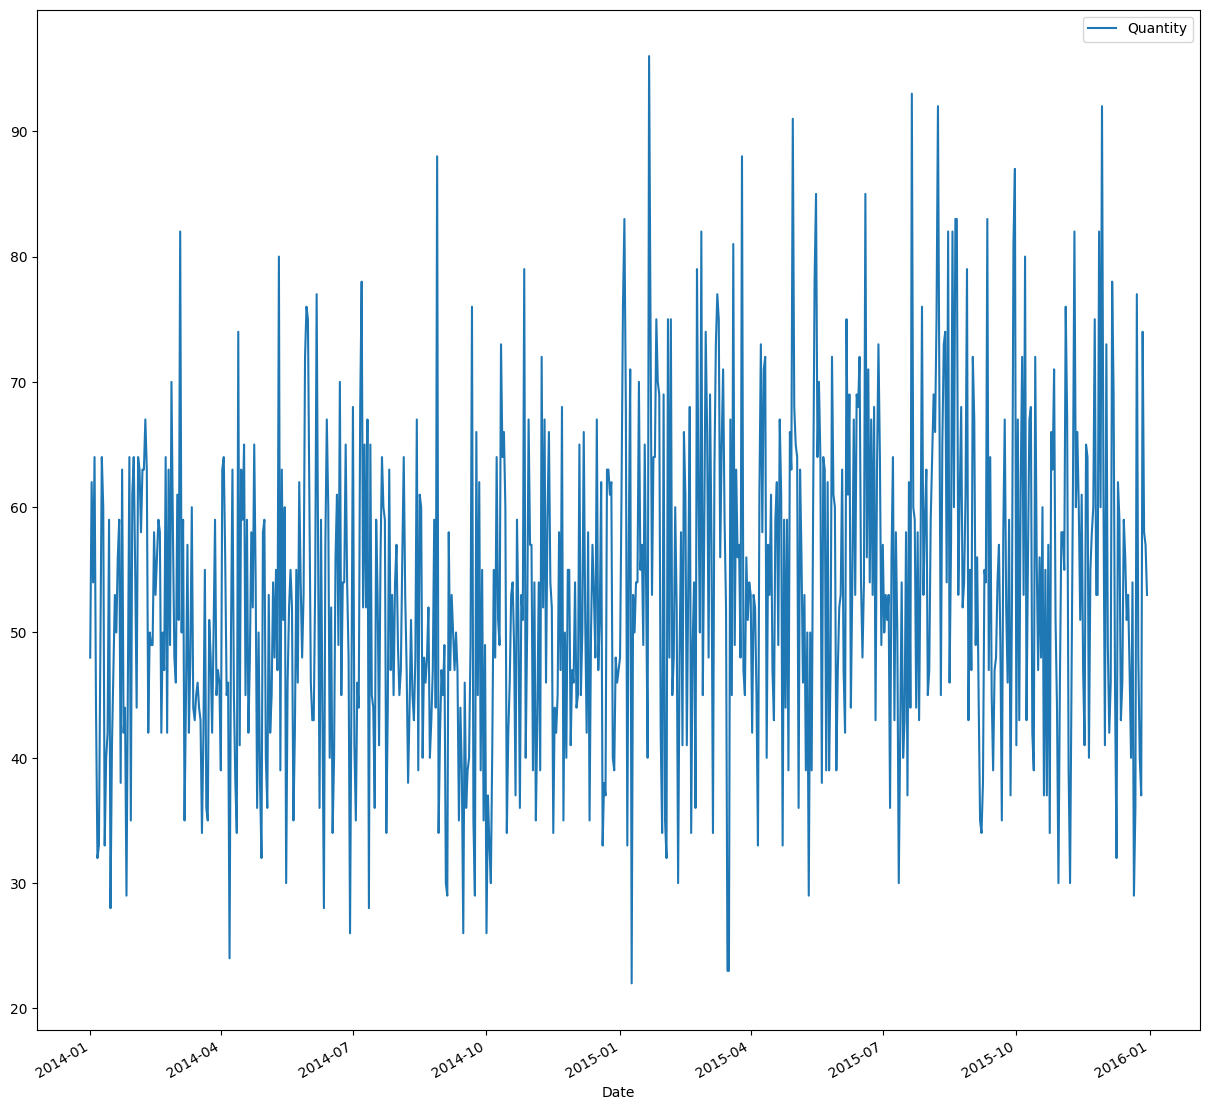

In [ ]:
#visualization of the target variable - Quantity
df_total['Quantity'].plot(figsize = (15,15), legend=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



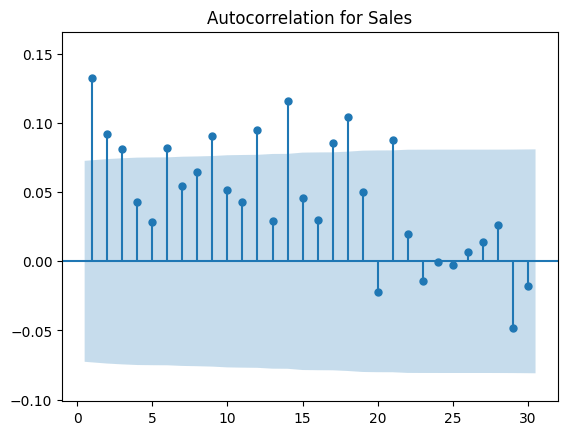

In [ ]:
plot_acf(df_total['Quantity'], lags = 30, title='Autocorrelation for Sales', zero=False, auto_ylims=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



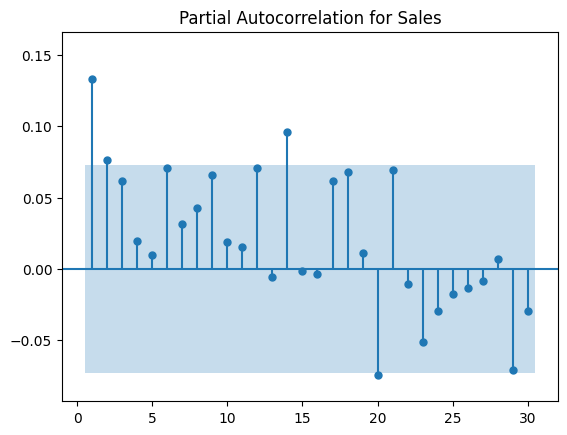

In [ ]:
plot_pacf(df_total['Quantity'], lags = 30, title='Partial Autocorrelation for Sales', zero=False, auto_ylims=True)
plt.show()

In [ ]:
sts.adfuller(df_total['Quantity'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(-13.150919372136146,
 1.3675553840390326e-24,
 2,
 725,
 {'1%': -3.4394018678958544,
  '5%': -2.865534780932388,
  '10%': -2.5688972751486325},
 5614.471838446302)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



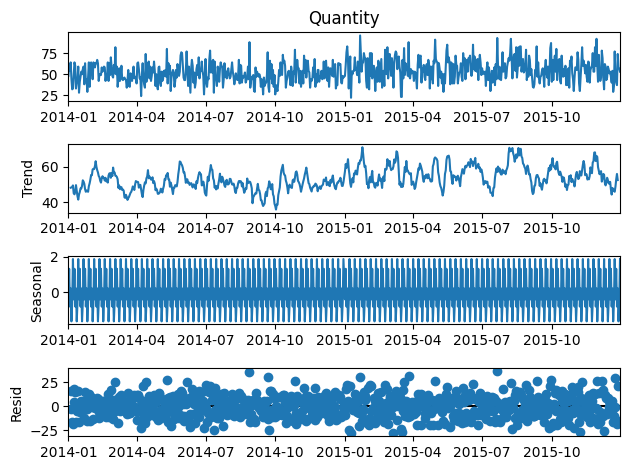

In [ ]:
sea_sales = seasonal_decompose(df_total['Quantity'], model='additive', period=7)
sea_sales.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<Axes: xlabel='Date'>

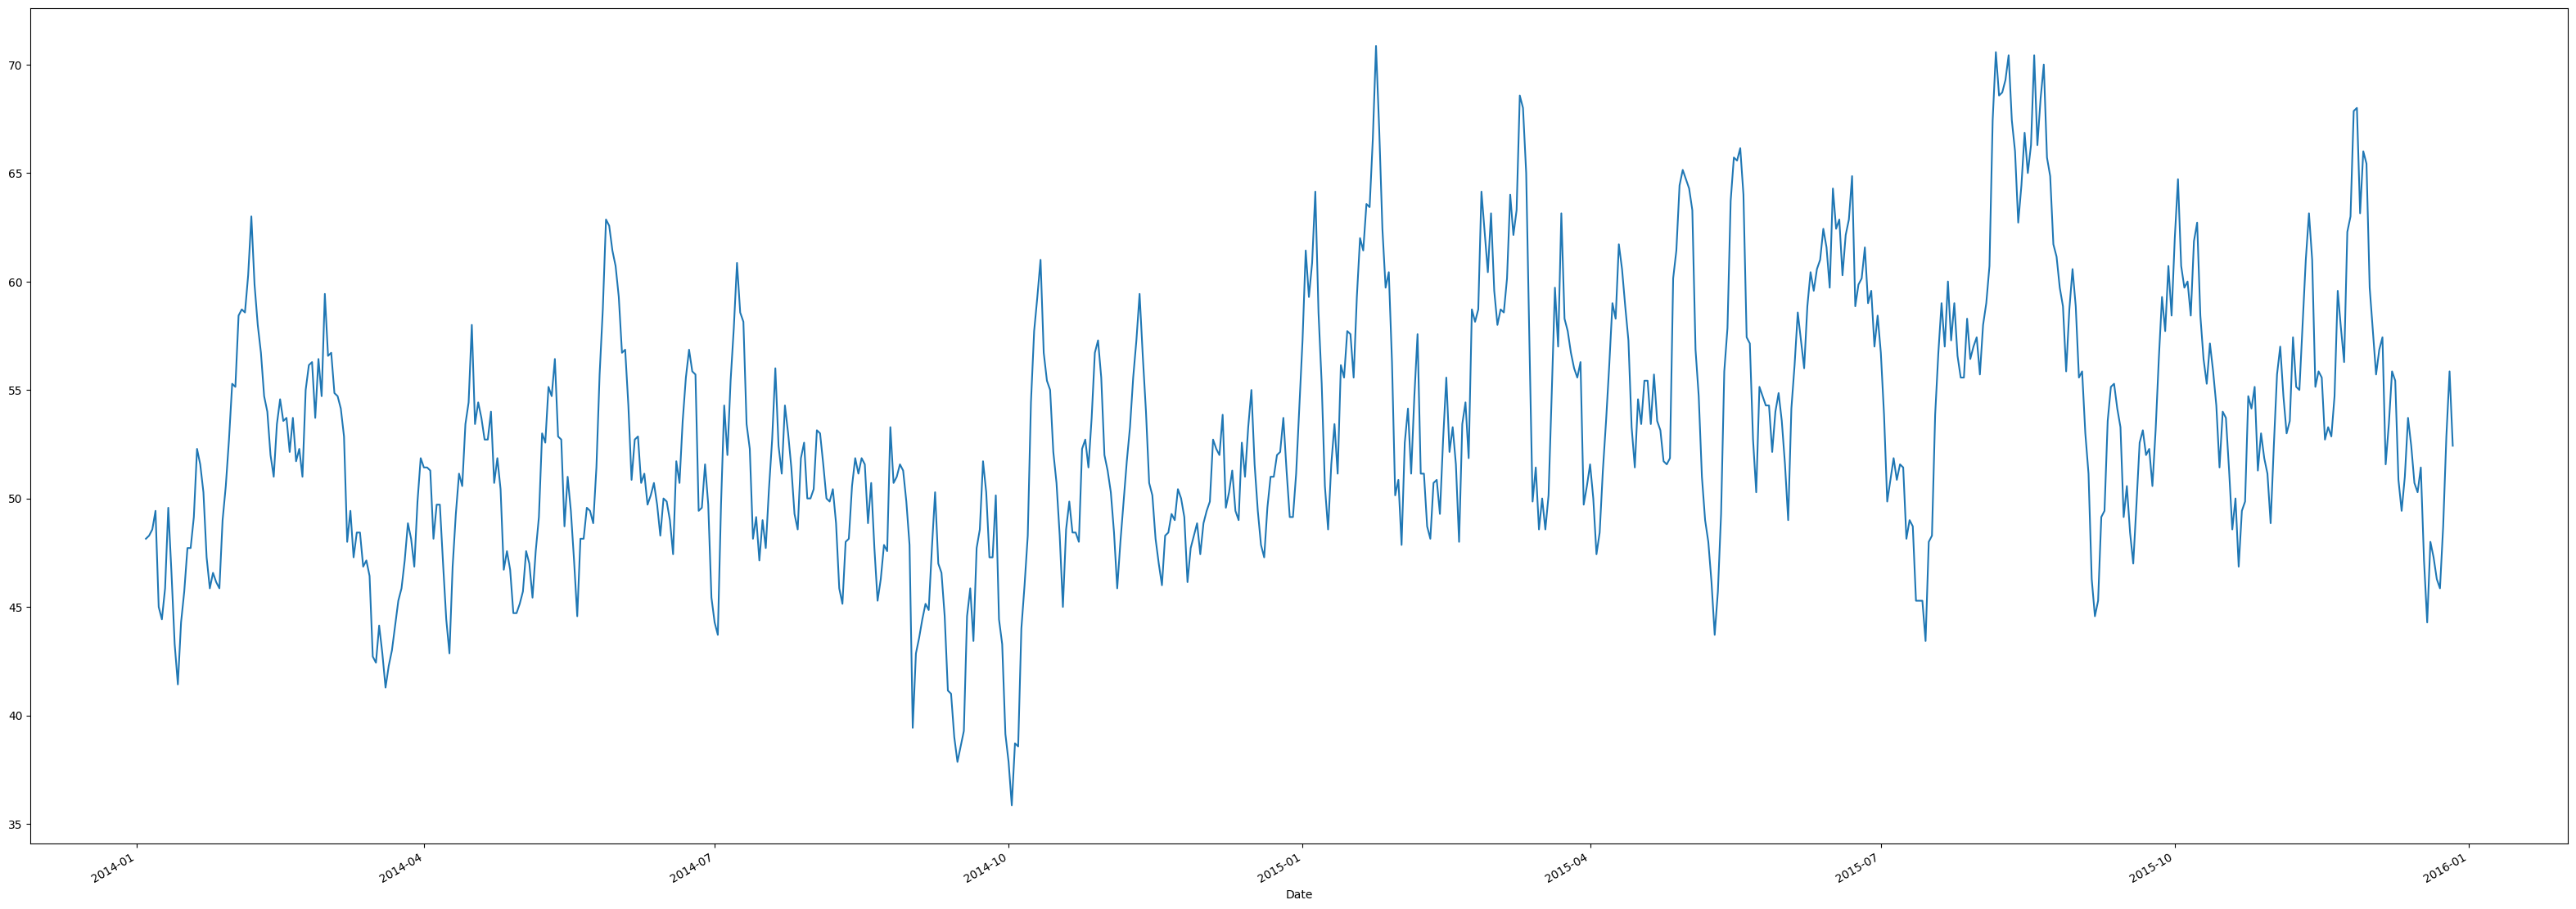

In [ ]:
sea_sales.trend.plot(figsize=(40,15))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<Axes: xlabel='Date'>

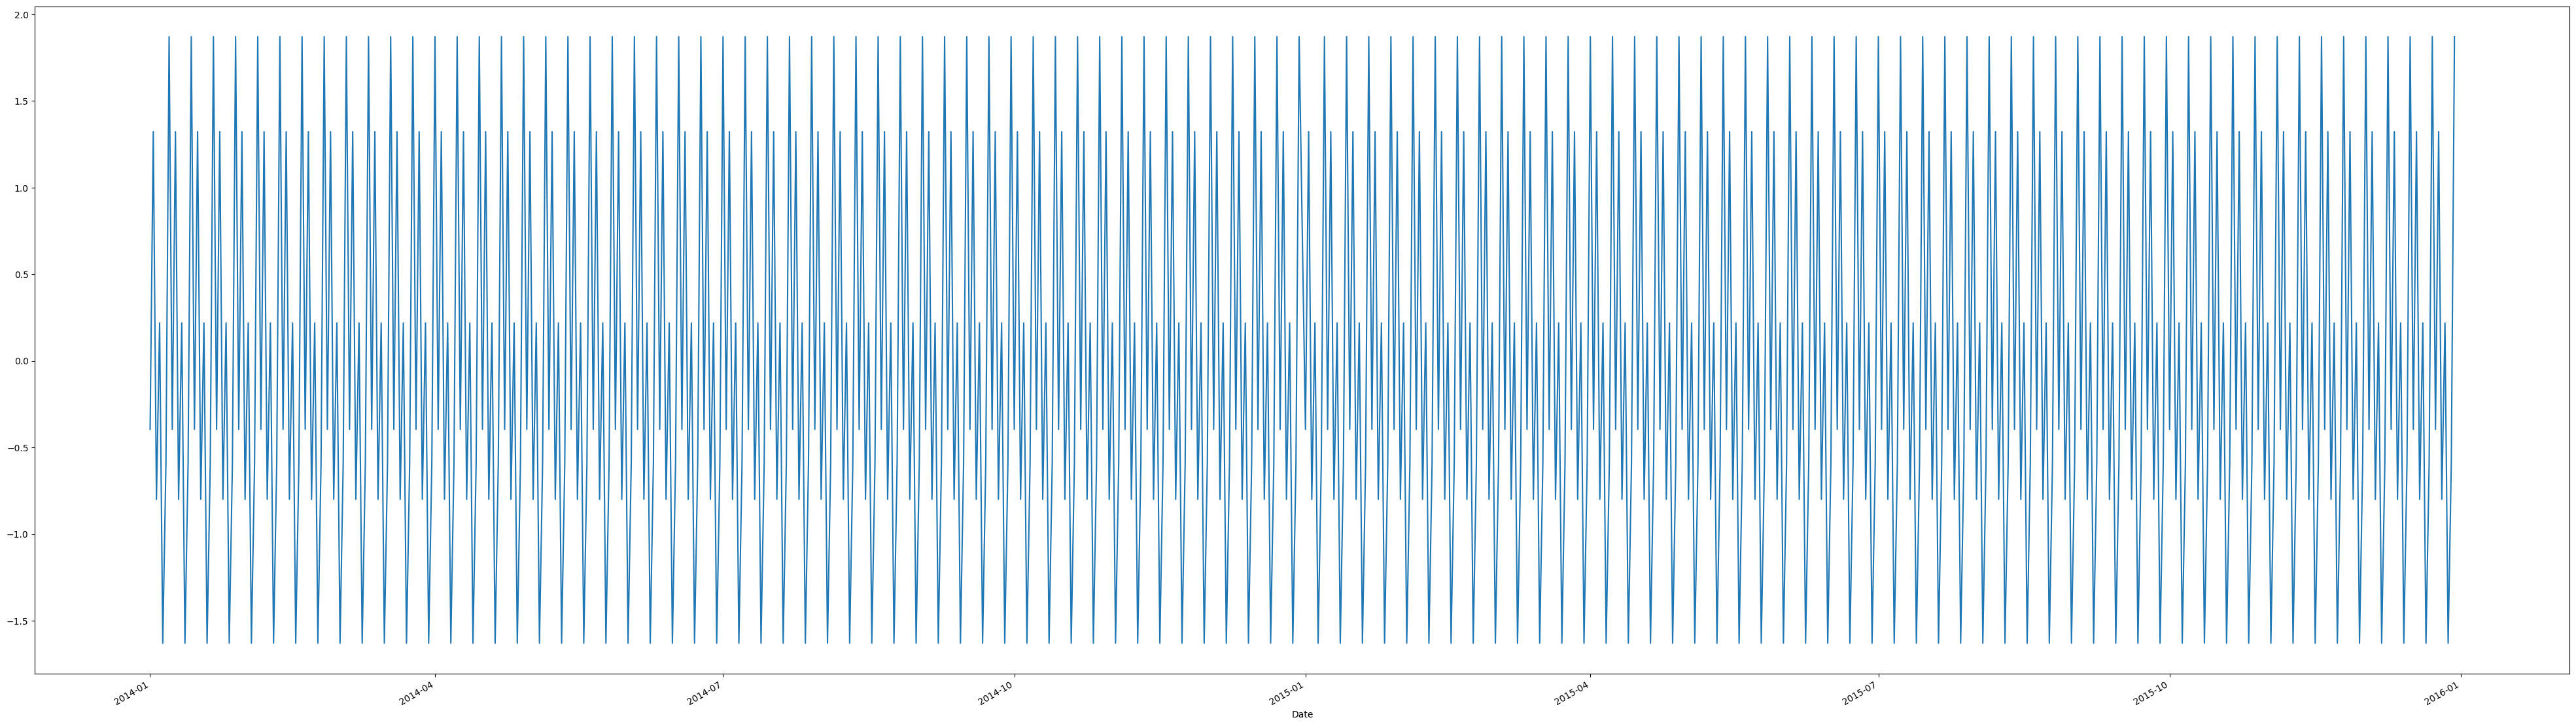

In [ ]:
sea_sales.seasonal.plot(figsize=(50,15))

In [ ]:
#As seasonality exists (non-stationary), data needs to be converted or flattened
df_total['Sales_shift'] = df_total['Quantity'].shift(periods=1) #the period is 1 because we are taking one previous value
df_total.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Quantity  Sales_shift
Date                             
2014-01-01        48          NaN
2014-01-02        62         48.0
2014-01-03        54         62.0
2014-01-04        64         54.0
2014-01-05        44         64.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<Axes: xlabel='Date'>

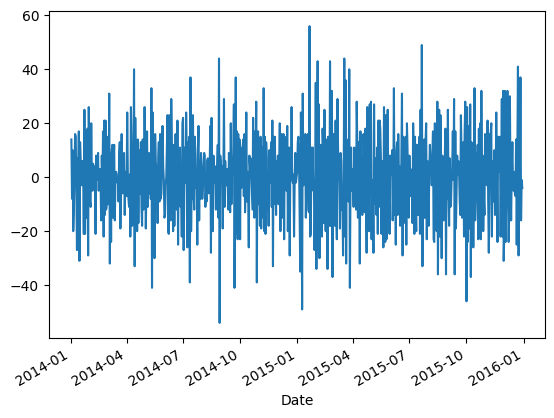

In [ ]:
#differencing method
df_total['diff'] = df_total['Quantity']-df_total['Sales_shift']
df_total['diff'].plot()

In [ ]:
df_total.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Quantity  Sales_shift  diff
Date                                   
2014-01-01        48          NaN   NaN
2014-01-02        62         48.0  14.0
2014-01-03        54         62.0  -8.0
2014-01-04        64         54.0  10.0
2014-01-05        44         64.0 -20.0

In [ ]:
#since the first value is NaN, exclude it while modelling
data1=df_total[1:]
data1.head()
#consider diff as the new target variable

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Quantity  Sales_shift  diff
Date                                   
2014-01-02        62         48.0  14.0
2014-01-03        54         62.0  -8.0
2014-01-04        64         54.0  10.0
2014-01-05        44         64.0 -20.0
2014-01-06        32         44.0 -12.0

In [ ]:
#split the data into train and test
size=int(len(data1)*0.70) #first 70% as train data
train_data=data1[:size]
train_data.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Quantity  Sales_shift  diff
Date                                   
2015-05-21        64         38.0  26.0
2015-05-22        63         64.0  -1.0
2015-05-23        39         63.0 -24.0
2015-05-24        62         39.0  23.0
2015-05-25        39         62.0 -23.0

In [ ]:
#next 30% as test data
test_data=data1[size:]
test_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Quantity  Sales_shift  diff
Date                                   
2015-05-26        47         39.0   8.0
2015-05-27        72         47.0  25.0
2015-05-28        61         72.0 -11.0
2015-05-29        60         61.0  -1.0
2015-05-30        39         60.0 -21.0

In [ ]:
#AR model
from statsmodels.tsa.arima.model import ARIMA
ar = ARIMA(train_data['diff'], order=(5,0,0))
ar_res=ar.fit()
ar_res.summary()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                  508
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -2031.404
Date:                Fri, 04 Aug 2023   AIC                           4076.808
Time:                        13:27:39   BIC                           4106.421
Sample:                             0   HQIC                          4088.420
                                - 508                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0067      0.188     -0.036      0.971      -0.374       0.361
ar.L1         -0.7581      0.045    -16.987      0.000      -0.846      -0.671
ar.L2         -0.5485      0.052    -10.500      0.000      -0.651      -0.446
ar.L3         -0.3711      0.057     -6.492      0.000      -0.483      -0.259
ar.L4         -0.2867      0.053     -5.434      0.000      -0.390      -0.183
ar.L5         -0.1897      0.044     -4.356      0.000      -0.275      -0.104
sigma2       173.8703     10.260     16.946      0.000     153.760     193.980
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 3.79
Prob(Q):                              0.63   Prob(JB):                         0.15
Heteroskedasticity (H):               1.66   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#MA model
ma=ARIMA(train_data['diff'], order=(0,0,5))
ma_res=ma.fit()
ma_res.summary()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/l

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                  508
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -1997.295
Date:                Fri, 04 Aug 2023   AIC                           4008.589
Time:                        13:27:40   BIC                           4038.203
Sample:                             0   HQIC                          4020.202
                                - 508                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0124      0.011      1.153      0.249      -0.009       0.034
ma.L1         -0.9189      0.043    -21.260      0.000      -1.004      -0.834
ma.L2          0.0013      0.062      0.021      0.984      -0.121       0.123
ma.L3         -0.0151      0.060     -0.252      0.801      -0.133       0.102
ma.L4         -0.0864      0.063     -1.371      0.170      -0.210       0.037
ma.L5          0.0363      0.044      0.817      0.414      -0.051       0.123
sigma2       151.2732      9.706     15.586      0.000     132.250     170.296
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.16
Prob(Q):                              0.99   Prob(JB):                         0.13
Heteroskedasticity (H):               1.56   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#ARMA model
arma = ARIMA(train_data['diff'], order=(1,0,1))
arma_res=arma.fit()
arma_res.summary()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                  508
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1999.043
Date:                Fri, 04 Aug 2023   AIC                           4006.086
Time:                        13:27:40   BIC                           4023.008
Sample:                             0   HQIC                          4012.721
                                - 508                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0124      0.012      1.045      0.296      -0.011       0.036
ar.L1          0.0707      0.043      1.657      0.097      -0.013       0.154
ma.L1         -0.9820      0.008   -115.611      0.000      -0.999      -0.965
sigma2       152.3344      9.701     15.702      0.000     133.320     171.349
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.38
Prob(Q):                              0.91   Prob(JB):                         0.11
Heteroskedasticity (H):               1.61   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: DeprecationWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Date
2015-05-26    9.059991
2015-05-27    4.260922
2015-05-28   -1.726335
2015-05-29   -2.181034
2015-05-30    2.763275
                ...   
2015-12-26   -0.006727
2015-12-27   -0.006727
2015-12-28   -0.006727
2015-12-29   -0.006727
2015-12-30   -0.006727
Name: predicted_mean, Length: 219, dtype: float64


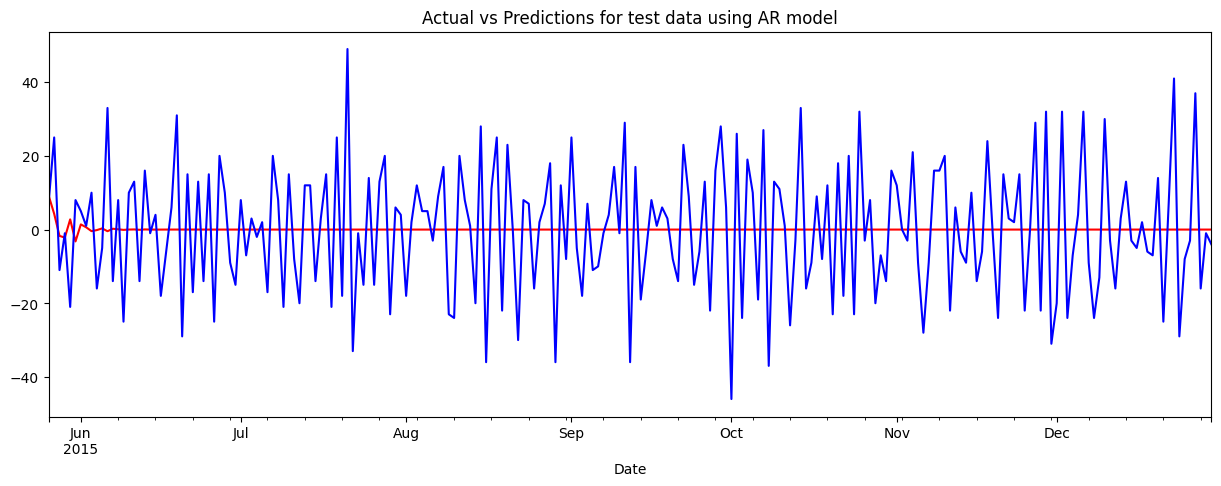

In [ ]:
#predicting test data using AR model
start = len(train_data['diff'])
end = len(train_data['diff'])+len(test_data['diff'])-1
pred1=ar_res.predict(start=start, end=end)
pred1.index=data1.index[start:end+1]
print(pred1)
pred1.plot(figsize=(15,15), color='red')
test_data['diff'].plot(figsize=(15,5), color='blue')
plt.title('Actual vs Predictions for test data using AR model')
plt.show()

In [ ]:
rmse_ar = math.sqrt(mean_squared_error(test_data['diff'], pred1))
rmse_ar = round(rmse_ar, 3)
rmse_ar

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



17.634

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: DeprecationWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Date
2015-05-26    15.227073
2015-05-27     1.680569
2015-05-28    -0.822534
2015-05-29     1.640705
2015-05-30    -0.590820
                ...    
2015-12-26     0.012436
2015-12-27     0.012436
2015-12-28     0.012436
2015-12-29     0.012436
2015-12-30     0.012436
Name: predicted_mean, Length: 219, dtype: float64


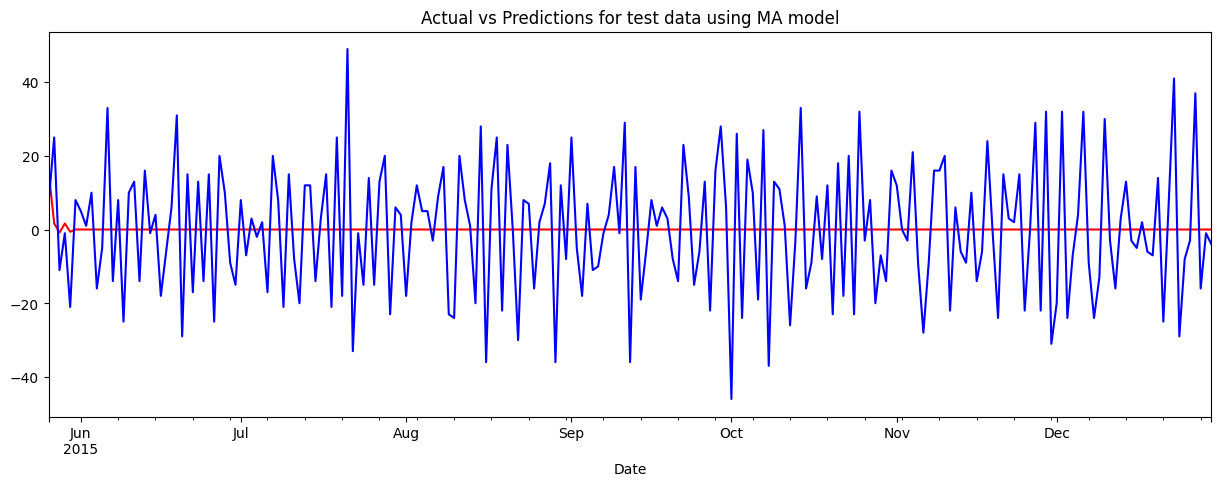

In [ ]:
#prediction of test data using MA model
pred2=ma_res.predict(start=start, end=end)
pred2.index=data1.index[start:end+1]
print(pred2)
pred2.plot(figsize=(15,15), color='red')
test_data['diff'].plot(figsize=(15,5), color='blue')
plt.title('Actual vs Predictions for test data using MA model')
plt.show()

In [ ]:
rmse2=math.sqrt(mean_squared_error(test_data['diff'], pred2))
rmse2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



17.627914780950714

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: DeprecationWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Date
2015-05-26    15.956813
2015-05-27     1.139919
2015-05-28     0.092149
2015-05-29     0.018057
2015-05-30     0.012818
                ...    
2015-12-26     0.012419
2015-12-27     0.012419
2015-12-28     0.012419
2015-12-29     0.012419
2015-12-30     0.012419
Name: predicted_mean, Length: 219, dtype: float64


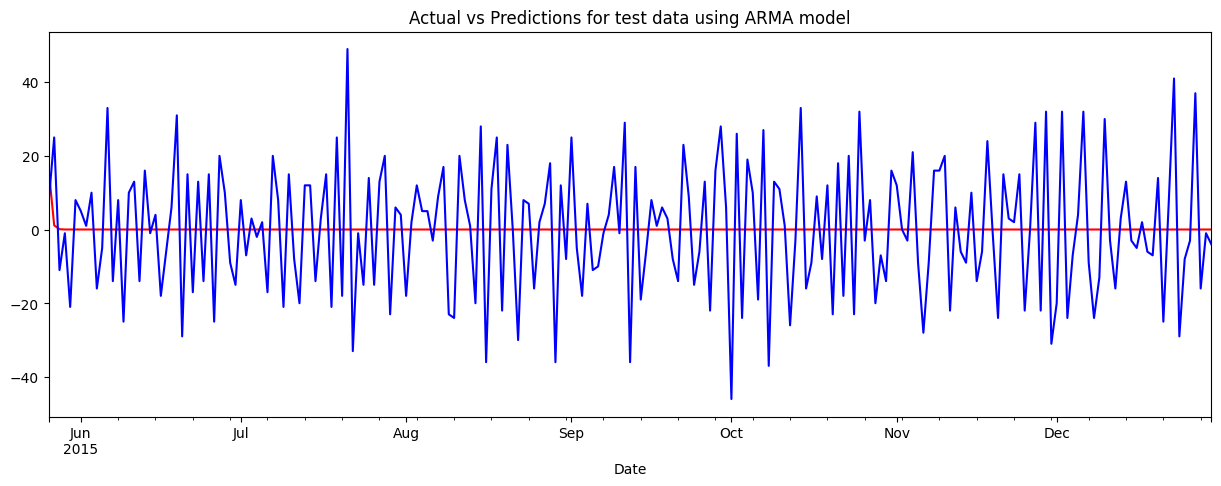

In [ ]:
#prediction of test data using ARMA model
pred3=arma_res.predict(start=start, end=end)
pred3.index=data1.index[start:end+1]
print(pred3)
pred3.plot(figsize=(15,15), color='red')
test_data['diff'].plot(figsize=(15,5), color='blue')
plt.title('Actual vs Predictions for test data using ARMA model')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: DeprecationWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Date
2015-05-26   -0.471026
2015-05-27   -0.471026
2015-05-28   -0.471026
2015-05-29   -0.471026
2015-05-30   -0.471026
                ...   
2015-12-26   -0.471026
2015-12-27   -0.471026
2015-12-28   -0.471026
2015-12-29   -0.471026
2015-12-30   -0.471026
Length: 219, dtype: float64


17.65263212668668

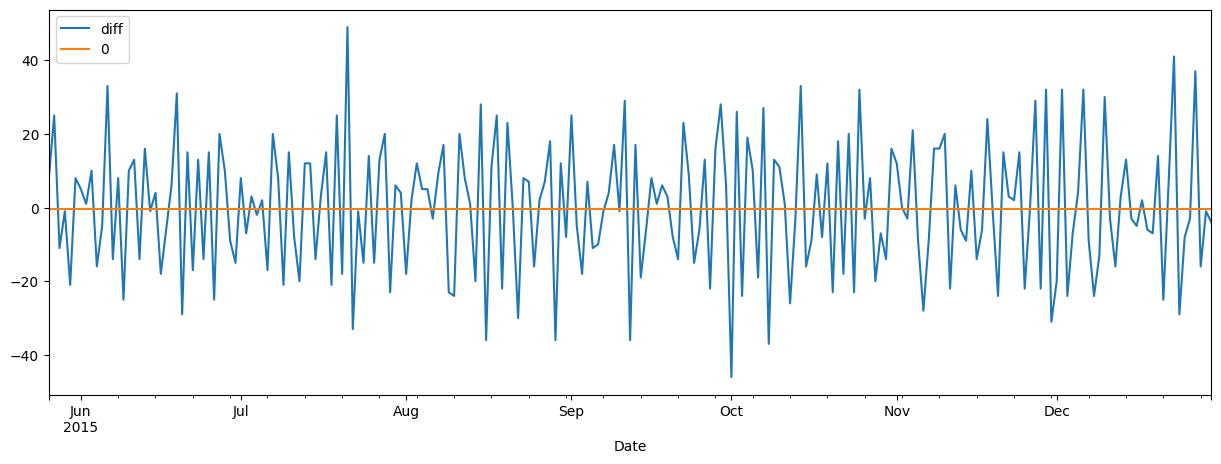

In [ ]:
rmse3=math.sqrt(mean_squared_error(test_data['diff'], pred3))
rmse3
#simple exponential smoothing
from statsmodels.tsa.api import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(train_data['diff'])
ses_model_results = ses_model.fit()
len(test_data['diff'])

start_index = len(train_data['diff'])
end_index = len(train_data['diff']) + len(test_data['diff'])-1

pred5 = ses_model_results.predict(start_index, end_index)
pred5.index = data1.index[start_index:end_index+1]
print(pred5)

actual_vs_pred = pd.concat([test_data['diff'], pred5], axis=1)
actual_vs_pred.plot(figsize = (15,5))

rmse5 = math.sqrt(mean_squared_error(test_data['diff'], pred5))
rmse5

Date
2015-05-26    6.661813
2015-05-27   -0.957029
2015-05-28    2.428202
2015-05-29   -0.333311
2015-05-30   -1.765587
                ...   
2015-12-26   -1.765587
2015-12-27    1.100607
2015-12-28   -6.979127
2015-12-29    6.661813
2015-12-30   -0.957029
Length: 219, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: DeprecationWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



17.695401598669598

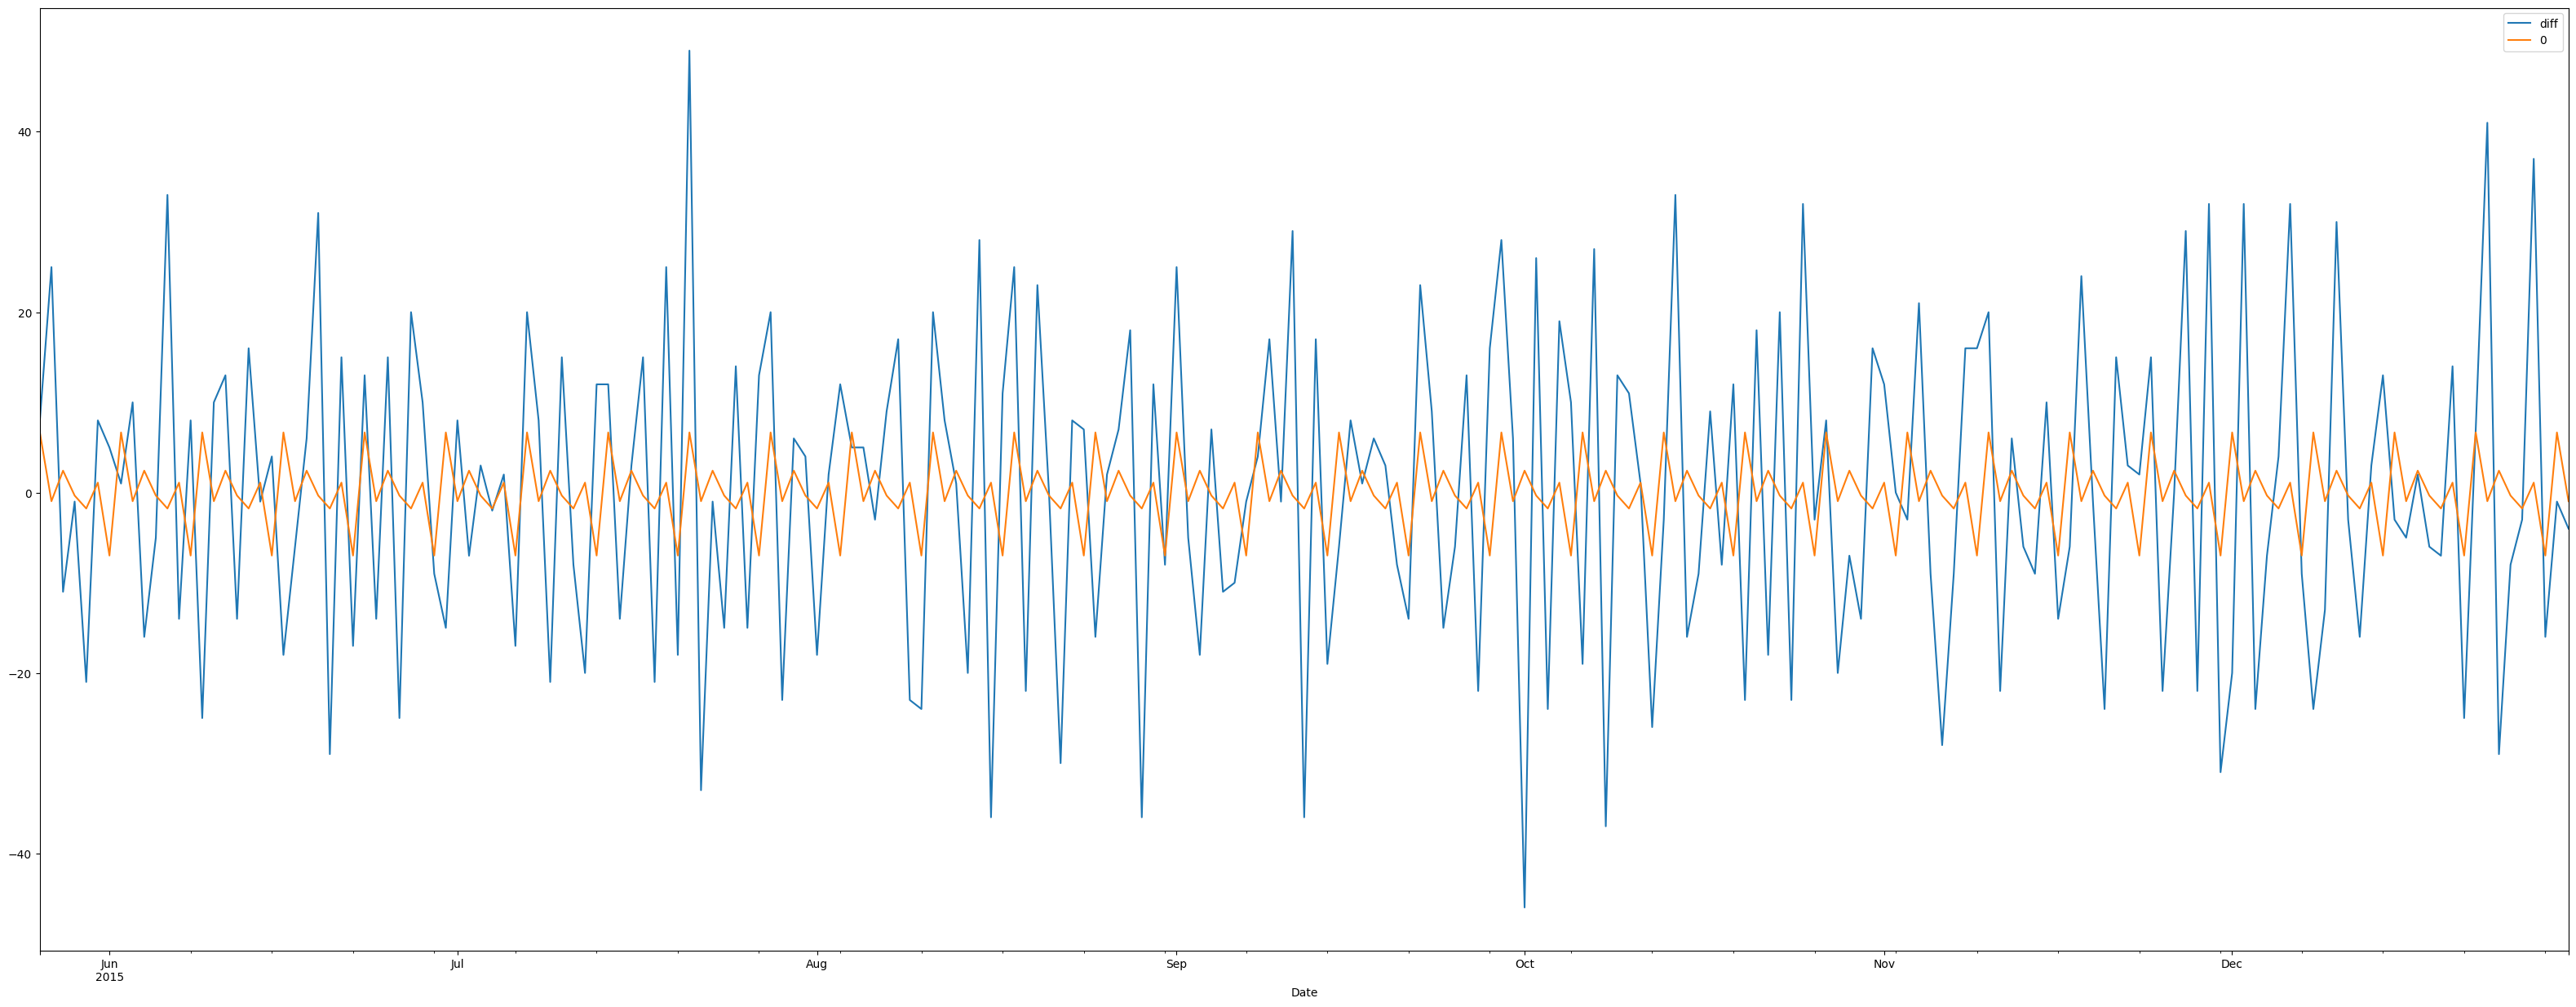

In [ ]:
#Holt winters method
from statsmodels.tsa.holtwinters import ExponentialSmoothing

holt_model = ExponentialSmoothing(train_data['diff'], seasonal_periods=7, trend=None, seasonal='add')

holt_model_results = holt_model.fit()
len(test_data['diff'])

pred6 = holt_model_results.predict(start_index, end_index)
pred6.index = data1.index[start_index:end_index+1]
print(pred6)

actual_vs_pred = pd.concat([test_data['diff'], pred6], axis=1)
actual_vs_pred.plot(figsize = (40,15))

rmse6 = math.sqrt(mean_squared_error(test_data['diff'], pred6))
rmse6

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

